In [5]:
from lmfit import Parameters, models
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
from core.util.units import compute_dft

In [18]:
def voigt_testing():

    x_axis = np.linspace(800, 1000, 301)

    mod, params = fitlogic.make_lorentzian_model()
    p = Parameters()

    params.add('amplitude',value=30.)
    params.add('center',value=920.)
    params.add('sigma',value=10)
    params.add('c',value=10.)

    data_noisy = (mod.eval(x=x_axis, params=params) + 0.2*np.random.normal(size=x_axis.shape))

    para = Parameters()

    voigt_mod = models.VoigtModel()

    plt.figure()
    plt.plot(x_axis, data_noisy, label='measured data')
    plt.xlabel('Time micro-s')
    plt.ylabel('signal')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

    error, amplitude, x_zero, sigma, offset = fitlogic.estimate_lorentzian_peak(
        x_axis,
        data_noisy,
        params)

    params = mod.make_params()

    # auxiliary variables
    stepsize = x_axis[1] - x_axis[0]
    n_steps = len(x_axis)

    if x_axis[1] - x_axis[0] > 0:

        params['amplitude'].set(value=amplitude, vary=True, min=2e-12, max=np.inf)
        params['sigma'].set(value=sigma, vary=True, min=(x_axis[1]-x_axis[0])/2,
                            max=(x_axis[-1]-x_axis[0])*10)
        params['center'].set(value=amplitude, vary=True,
                             min=(x_axis[0])-n_steps*stepsize,
                             max=(x_axis[-1])+n_steps*stepsize)

    if x_axis[0] - x_axis[1] > 0:

        params['amplitude'].set(value=amplitude, vary=True, min=2e-12, max=np.inf)
        params['sigma'].set(value=sigma, vary=True, min=(x_axis[0]-x_axis[1])/2,
                            max=(x_axis[0]-x_axis[1])*10)
        params['center'].set(value=amplitude, vary=True,
                             min=x_axis[-1],
                             max=x_axis[0])


    result = mod.fit(data_noisy, x=x_axis, params=params)

    plt.figure()
    plt.plot(x_axis, data_noisy, label='measured data')
    plt.plot(x_axis, result.best_fit, label='fit')
    plt.xlabel('Time micro-s')
    plt.ylabel('signal')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Traceback (most recent call last):
  File "/home/jan/qo/qudi/logic/jupyterkernel/qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-0e83b90194d9>", line 1, in <module>
    voigt_testing()
  File "<ipython-input-18-1c37b8fb210a>", line 29, in voigt_testing
    params)
  File "/home/jan/qo/qudi/logic/fitmethods/lorentzianlikemethods.py", line 406, in estimate_lorentzian_peak
    params_dip)
  File "/home/jan/qo/qudi/logic/fitmethods/lorentzianlikemethods.py", line 350, in estimate_lorentzian_dip
    data_smooth, offset = self.find_offset_parameter(x_axis, data)
  File "/home/jan/qo/qudi/logic/fitmethods/generalmethods.py", line 480, in find_offset_parameter
    hist = np.histogram(data_smooth, bins=10)
  File "/usr/lib/python3/dist-packages/numpy/lib/function_base.py", line 669, in histogram
    'range parameter must be finite.')
ValueError: range parameter must be finite.


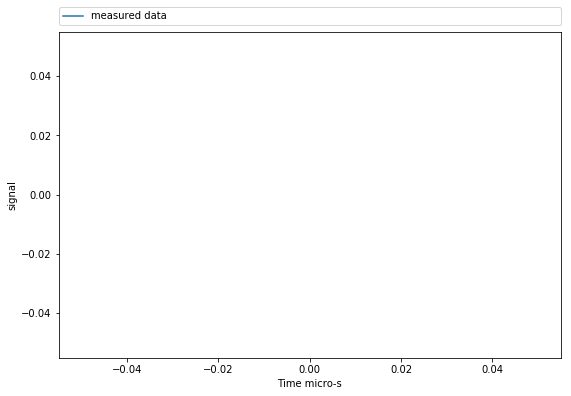

In [19]:
voigt_testing()